# Resolución de Digit Recognition usando una Red Neuronal Convolucional (CNN)

En esta libreta exploraremos la resolución del problema de digit recognition a través de un tipo concreto de red neuronal, la red neuronal convolucional.

Una red neuronal convolucional (CNN) es un modelo de aprendizaje profundo especializado en procesar imágenes. Utiliza capas de convolución para detectar patrones, activaciones no lineales para complejidad, agrupación para reducir dimensiones y capas densas para clasificación. Durante el entrenamiento, ajusta sus pesos para hacer predicciones precisas en nuevas imágenes, siendo ampliamente aplicada en tareas de visión por computadora.

## Importación de librerías

La librería principal será tensorflow, la cual nos permitirá crear el modelo y entrenarlo en base a los datos de las imágenes de los dígitos.

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

from keras.datasets import mnist

Cargamos el dataset, el cual viene ya serparado en conjuntos de Train y Test y con las etiquetas de las clases a parte.

In [54]:
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

print("(Tamaño del dataset, x, y): ", X_train.shape)

(Tamaño del dataset, x, y):  (60000, 28, 28)


Mostraremos ahora algunas de las imagenes contenidas en el dataset con su correspondiente etiqueta

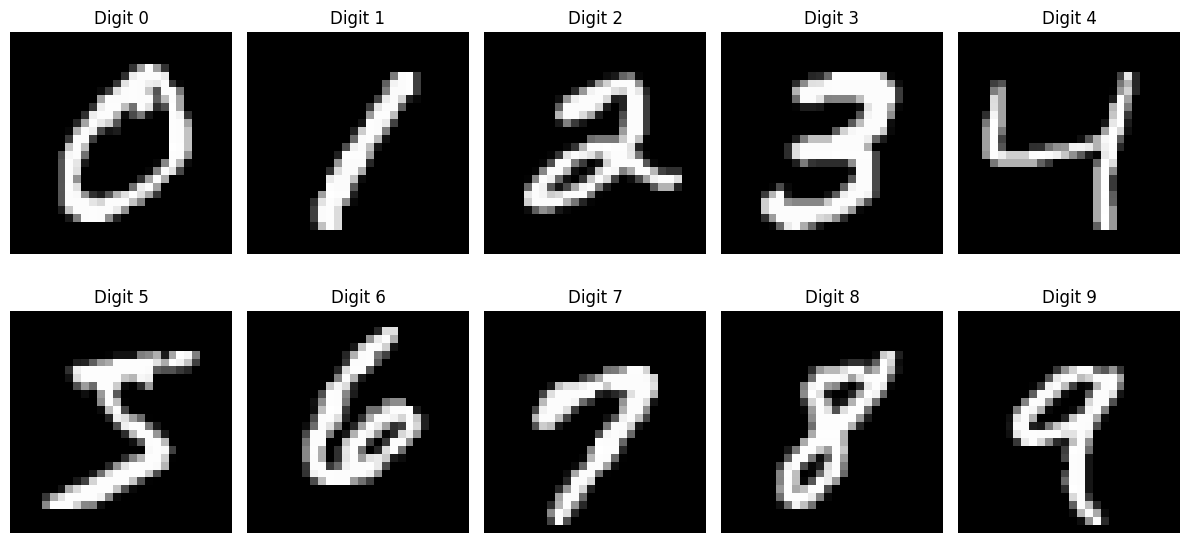

In [56]:
import matplotlib.pyplot as plt

digit_indices = {}

#Encontramos el indice de la primera ocurrencia de cada dígito
for digit in range(10):
    digit_indices[digit] = next(idx for idx, label in enumerate(y_train) if label == digit)

# Ploteamos un ejemplo para cada dígito
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

for digit, ax in zip(range(10), axes.flatten()):
    index_to_print = digit_indices[digit]
    image_to_print = X_train[index_to_print].reshape(28, 28)
    ax.imshow(image_to_print, cmap='gray')
    ax.set_title(f'Digit {digit}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Reshape del conjunto de datos y normalización


In [22]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

## Creamos y compilamos el modelo

Nuestro modelo se compone de las siguientes capas:

- Capas Convolucionales (Conv2D):

  Utilizadas para detectar patrones locales en la imagen mediante filtros de convolución.
  La primera capa convolucional tiene 32 filtros de tamaño (3, 3) y la segunda tiene 64 filtros.
  Se aplica la función de activación ReLU para introducir no linealidades.

- Capas de Agrupación (MaxPooling2D):

  Reducen las dimensiones espaciales de los datos al seleccionar los valores máximos en regiones específicas.
  Se utilizan después de las capas convolucionales para conservar la información relevante.

- Capa de Aplanado (Flatten):

  Transforma la salida de las capas convolucionales y de agrupación en un vector unidimensional.
  Prepara los datos para ser utilizados en capas densas (totalmente conectadas).

- Capas Densas (Dense):

  En la primera capa densa, se utilizan 128 neuronas con la función de activación ReLU.
  La última capa densa tiene 10 neuronas con la función de activación softmax, apropiada para problemas de clasificación con 10 clases.

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

''' model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))  '''

input_shape = (28, 28, 1)

# Create a Sequential model
model = Sequential()

# Convolutional and Pooling Layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

## Representación visual de las capas

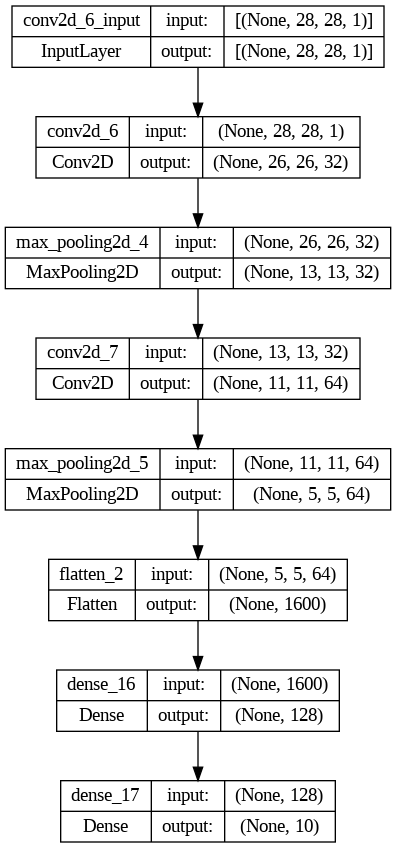

In [58]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

Procedemos a compilar el modelo y a entrenarlo con los datos que hemos preparado al principio

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 48s 78ms/step - loss: 0.7812 - accuracy: 0.9177
Epoch 2/10
600/600 [==============================] - 46s 77ms/step - loss: 0.0610 - accuracy: 0.9808
Epoch 3/10
600/600 [==============================] - 45s 75ms/step - loss: 0.0402 - accuracy: 0.9870
Epoch 4/10
600/600 [==============================] - 49s 82ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 5/10
600/600 [==============================] - 52s 86ms/step - loss: 0.0250 - accuracy: 0.9923
Epoch 6/10
600/600 [==============================] - 49s 82ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 7/10
600/600 [==============================] - 50s 84ms/step - loss: 0.0204 - accuracy: 0.9936
Epoch 8/10
600/600 [==============================] - 48s 80ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 9/10
600/600 [==============================] - 58s 96ms/step - loss: 0.0168 - accuracy: 0.9944
Epoch 10/10
600/600 [==============================] - 45s 75ms/step - loss: 0.016

Guardamos nuestro modelo en un archivo para no tener que volver a compilarlo

In [61]:
model.save('cnn_digit_recognition.keras')

Lo cargamos desde el archivo

In [62]:
from tensorflow.keras.models import load_model

loaded_model = load_model('cnn_digit_recognition.keras')

Ahora pasaremos a evaluar el modelo con los datos de test

In [64]:
scores = loaded_model.evaluate(X_test,y_test)
print("Accuracy: " , scores[1] * 100)

313/313 [==============================] - 4s 11ms/step - loss: 0.0631 - accuracy: 0.9866
Accuracy:  98.65999817848206


Finalmente obtenemos un accuracy aproximado del 98%, lo cual concluye en un modelo muy bueno para este dataset.


Veamos ahora una predicción de prueba con nuestro modelo entrenado


1/1 [==============================] - 0s 185ms/step


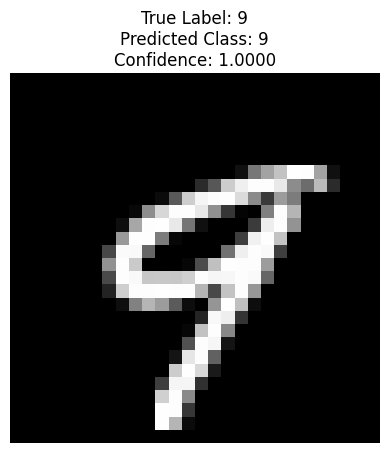

In [65]:
random_index = np.random.randint(0, len(X_test))

# Imagen aleatoria junto su etiqueta
random_image = X_test[random_index]
true_label = y_test[random_index]

# Reshape de la imagen
random_image = random_image.reshape(1, 28, 28, 1)

# prediccion
predictions = loaded_model.predict(random_image)

# Clase predecida y confianza
predicted_class = np.argmax(predictions)
confidence = predictions[0, predicted_class]

# Mostramos la imagen
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f'True Label: {true_label}\nPredicted Class: {predicted_class}\nConfidence: {confidence:.4f}')
plt.axis('off')
plt.show()